## 사용전 환경설정

In [1]:
# 구글드라이브 연결하기
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
# 위 명령어 실행 후 세션을 다시 시작
# 한글깨짐 현상 해결 코드
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

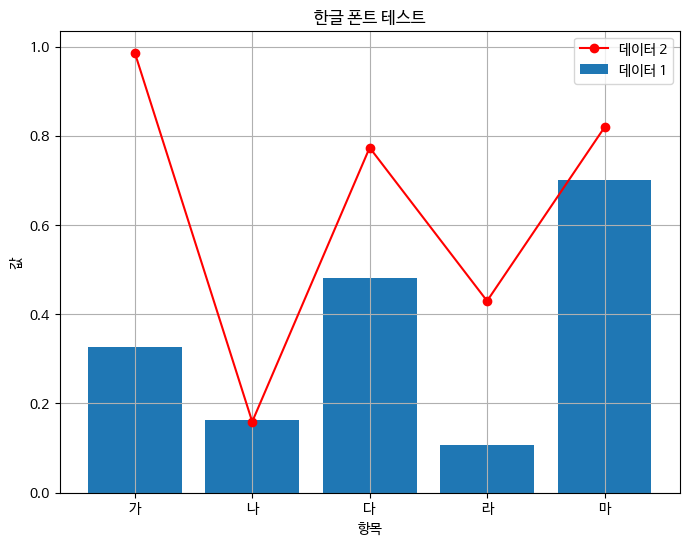

안녕하세요, 한글 폰트 테스트입니다.


In [44]:
# 그래프에 한글 깨짐이 있는지 확인
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 샘플 데이터 생성
data = np.random.rand(5, 2)
labels = ['가', '나', '다', '라', '마']

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(labels, data[:, 0], label='데이터 1')
plt.plot(labels, data[:, 1], marker='o', linestyle='-', color='red', label='데이터 2')
plt.title('한글 폰트 테스트')
plt.xlabel('항목')
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.show()

# 한글 텍스트 출력 테스트
print("안녕하세요, 한글 폰트 테스트입니다.")

## 따릉이 대여,반납 분석
대여 및 반납 이력, 대여소 정보 등을 활용하여 요일별,시간별, 지역별 따릉이 사용량을 분석합니다

### 데이터 둘러보기
따릉이 대여이력 정보를 불러옵니다
컬럼의 종류 결측치등 데이터를 살펴봅니다


#### 사용데이터1 : 서울특별시 공공자전거 대여이력 정보

In [45]:
# csv파일 경로에서 공공자전거 대여이력 데이터를 불러옴
# 데이터 크기 때문에 2024년12월 데이터만 사용
#csvPath1 = '/content/drive/MyDrive/Multi Modal AI개발자 양성 과정/code/데이터분석수업실습/따릉이 데이터 분석/서울특별시 공공자전거 대여이력 정보_2410.csv'
#csvPath2 = '/content/drive/MyDrive/Multi Modal AI개발자 양성 과정/code/데이터분석수업실습/따릉이 데이터 분석/서울특별시 공공자전거 대여이력 정보_2411.csv'
csvPath = '/content/drive/MyDrive/Multi Modal AI개발자 양성 과정/code/데이터분석수업실습/따릉이 데이터 분석/서울특별시 공공자전거 대여이력 정보_2412.csv'
#df1 = pd.read_csv(csvPath1, encoding='cp949')
#df2 = pd.read_csv(csvPath2, encoding='cp949')
df = pd.read_csv(csvPath, encoding='cp949')
df.shape

(2277919, 17)

In [46]:
# 날짜 컬럼을 datetime 형식으로 변환
df['대여일시'] = pd.to_datetime(df['대여일시'], errors='coerce')
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277919 entries, 0 to 2277918
Data columns (total 17 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  object        
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  자전거구분     object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(13)
memory usage: 295.4+ MB


In [9]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,0,2024-12-01 00:02:41,04560,양평동성원아파트,0,2,625.10,1997,M,내국인,ST-278,ST-2811,일반자전거
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,0,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,0,2,0.00,1983,NaN,내국인,ST-1710,ST-2049,일반자전거
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,0,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,0,3,890.00,1991,\N,내국인,ST-294,ST-1539,일반자전거
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,0,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),0,4,671.61,1994,\N,내국인,ST-834,ST-1511,일반자전거
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,0,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,0,3,49.16,\N,M,내국인,ST-1083,ST-1684,일반자전거


In [10]:
df.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분
2277914,SPB-41249,2024-12-31 23:14:10,04032,불암주유소 앞,0,2025-01-01 01:49:08,01656,중앙하이츠 아파트 입구,0,155,1563.69,1979,F,내국인,ST-2719,ST-1124,일반자전거
2277915,SPB-48042,2024-12-31 21:45:25,03759,이대서울병원,0,2025-01-01 01:51:47,\N,\N,\N,8,1193.00,1991,M,내국인,ST-2569,\N,일반자전거
2277916,SPB-66936,2024-12-31 23:46:21,04629,한강초교보도육교 앞,0,2025-01-01 02:01:36,00111,상수역 2번출구 앞,0,135,10427.74,\N,\N,\N,ST-2456,ST-15,일반자전거
2277917,SPB-50325,2024-12-31 23:46:26,04629,한강초교보도육교 앞,0,2025-01-01 02:02:32,00111,상수역 2번출구 앞,0,136,10414.74,\N,\N,\N,ST-2456,ST-15,일반자전거
2277918,SPB-31248,2024-12-31 23:19:31,02732,마곡수명산 1-2단지,0,2025-01-01 02:05:48,03759,이대서울병원,0,166,2242.45,\N,M,내국인,ST-2049,ST-2569,일반자전거


### 데이터 전처리
- 데이터 타입을 확인하고 적절한 타입으로 변경합니다
- 결측치를 확인하고 삭제또는 값을 대체합니다
- 필요한 컬럼만 남깁니다

In [47]:
# 각 컬럼별 결측치 개수 확인
df.isnull().sum()
#df.isna().sum()

,0
자전거번호,0
대여일시,0
대여 대여소번호,0
대여 대여소명,0
대여거치대,0
반납일시,0
반납대여소번호,0
반납대여소명,0
반납거치대,0
이용시간(분),0


In [48]:
# 데이터에서 '\N'이 들어있는 데이터를 발견함.
# 각 컬럼별 '\N' 값 개수 확인
for col in df.columns:
    count_N = (df[col] == '\\N').sum()
    print(f"'{col}' 컬럼의 '\\N' 개수: {count_N}")

# DataFrame 전체에서 '\N' 값 개수 확인
total_N_count = (df == '\\N').sum().sum()
print(f"\nDataFrame 전체의 '\\N' 개수: {total_N_count}")

'자전거번호' 컬럼의 '\N' 개수: 259933
'대여일시' 컬럼의 '\N' 개수: 0
'대여 대여소번호' 컬럼의 '\N' 개수: 35558
'대여 대여소명' 컬럼의 '\N' 개수: 40561
'대여거치대' 컬럼의 '\N' 개수: 40561
'반납일시' 컬럼의 '\N' 개수: 0
'반납대여소번호' 컬럼의 '\N' 개수: 47113
'반납대여소명' 컬럼의 '\N' 개수: 52169
'반납거치대' 컬럼의 '\N' 개수: 53695
'이용시간(분)' 컬럼의 '\N' 개수: 0
'이용거리(M)' 컬럼의 '\N' 개수: 0
'생년' 컬럼의 '\N' 개수: 326472
'성별' 컬럼의 '\N' 개수: 710087
'이용자종류' 컬럼의 '\N' 개수: 192521
'대여대여소ID' 컬럼의 '\N' 개수: 0
'반납대여소ID' 컬럼의 '\N' 개수: 10821
'자전거구분' 컬럼의 '\N' 개수: 259933

DataFrame 전체의 '\N' 개수: 2029424


In [50]:
# '\N' 값을 numpy의 NaN으로 대체
df = df.replace('\\N', np.nan)

In [51]:
# null 데이터를 다시 집계해보기
df.isnull().sum()

,0
자전거번호,259933
대여일시,0
대여 대여소번호,35558
대여 대여소명,40561
대여거치대,40561
반납일시,0
반납대여소번호,47113
반납대여소명,52169
반납거치대,53695
이용시간(분),0


In [52]:
# prompt: 생년, 성별 컬럼을 삭제
# 불필요한 컬럼을 삭제
df = df.drop(columns=['생년', '성별'])
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),이용자종류,대여대여소ID,반납대여소ID,자전거구분
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,0,2024-12-01 00:02:41,04560,양평동성원아파트,0,2,625.10,내국인,ST-278,ST-2811,일반자전거
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,0,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,0,2,0.00,내국인,ST-1710,ST-2049,일반자전거
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,0,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,0,3,890.00,내국인,ST-294,ST-1539,일반자전거
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,0,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),0,4,671.61,내국인,ST-834,ST-1511,일반자전거
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,0,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,0,3,49.16,내국인,ST-1083,ST-1684,일반자전거


In [53]:
# 불필요한 컬럼을 삭제
df = df.drop(columns=['이용자종류'])
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),대여대여소ID,반납대여소ID,자전거구분
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,0,2024-12-01 00:02:41,04560,양평동성원아파트,0,2,625.10,ST-278,ST-2811,일반자전거
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,0,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,0,2,0.00,ST-1710,ST-2049,일반자전거
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,0,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,0,3,890.00,ST-294,ST-1539,일반자전거
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,0,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),0,4,671.61,ST-834,ST-1511,일반자전거
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,0,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,0,3,49.16,ST-1083,ST-1684,일반자전거


In [54]:
# prompt: 컬럼중 int64 타입형인 컬럼은 int32로 변경

# 'int64' 타입 컬럼을 'int32'로 변경
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('int32')

# 변경된 데이터 타입 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277919 entries, 0 to 2277918
Data columns (total 14 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  object        
 3   대여 대여소명   object        
 4   대여거치대     object        
 5   반납일시      datetime64[ns]
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int32         
 10  이용거리(M)   float64       
 11  대여대여소ID   object        
 12  반납대여소ID   object        
 13  자전거구분     object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(10)
memory usage: 234.6+ MB


In [55]:
# prompt: '자전거구분'중 null값인 곳은 '일반자전거'로 변경

# '자전거구분' 컬럼의 null 값을 '일반자전거'로 변경
df['자전거구분'].fillna('일반자전거', inplace=True)
df['반납거치대'].fillna('일반자전거', inplace=True)
# 변경 확인 (결측치 재확인)
df.isnull().sum()

,0
자전거번호,259933
대여일시,0
대여 대여소번호,35558
대여 대여소명,40561
대여거치대,40561
반납일시,0
반납대여소번호,47113
반납대여소명,52169
반납거치대,53695
이용시간(분),0


In [59]:
# prompt: 대여거치대와 반납거치대 컬럼삭제
# '대여거치대', '반납거치대' 데이터값이 0, null,90이상의 숫자로 되어있어 수치 데이터로서 필요없다고 판단됨
# 삭제 후에 실행해서 오류 메시지가 출력되었습니다
# 불필요한 컬럼을 삭제
df = df.drop(columns=['대여거치대', '반납거치대'])
df.head()

KeyError: "['대여거치대', '반납거치대'] not found in axis"

In [60]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),대여대여소ID,반납대여소ID,자전거구분
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,2024-12-01 00:02:41,04560,양평동성원아파트,2,625.10,ST-278,ST-2811,일반자전거
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,2,0.00,ST-1710,ST-2049,일반자전거
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,3,890.00,ST-294,ST-1539,일반자전거
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),4,671.61,ST-834,ST-1511,일반자전거
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,3,49.16,ST-1083,ST-1684,일반자전거


In [65]:
# 결측치를 확인하고 삭제해야하는지 판단하기
df.isnull().sum()

,0
자전거번호,0
대여일시,0
대여 대여소번호,0
대여 대여소명,0
반납일시,0
반납대여소번호,0
반납대여소명,0
이용시간(분),0
이용거리(M),0
대여대여소ID,0


In [62]:
# prompt: df에 null값이 들어있는 행을 삭제
# 결측치가 있는 데이터는 고유식별번호나 표에서 분류될 장소명 이므로 결측치를 삭제하기로함
df.dropna(inplace=True)
df.isnull().sum()

,0
자전거번호,0
대여일시,0
대여 대여소번호,0
대여 대여소명,0
반납일시,0
반납대여소번호,0
반납대여소명,0
이용시간(분),0
이용거리(M),0
대여대여소ID,0


####  서울특별시 공공자전거 대여소 정보

In [95]:
csvPath2 = '/content/drive/MyDrive/Multi Modal AI개발자 양성 과정/code/데이터분석수업실습/따릉이 데이터 분석/공공자전거 대여소 정보(23.06월 기준).csv'
df2 = pd.read_csv(csvPath2, encoding='cp949',header=2)
df2.shape

(2751, 21)

In [91]:
df2.head()

,Unnamed: 0,Unnamed: 1,자치구,상세주소,위도,경도,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20,20,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12,12,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8,8,QR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# 불필요한 컬럼과 행을 삭제
# prompt: 컬럼 Unnamed: 11 부터 맨뒤까지 컬럼을 삭제해줘 0번, 1번행도 삭제해줘

# Unnamed: 11 컬럼부터 끝까지 삭제
df2 = df2.loc[:, :'Unnamed: 10']

# 0번, 1번 행 삭제
df2 = df2.drop([0, 1])

df2.head()

,Unnamed: 0,Unnamed: 1,자치구,상세주소,위도,경도,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
2,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20,20,QR,NaN
3,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12,12,QR,NaN
4,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8,8,QR,NaN
5,305.0,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16,16,QR,NaN
6,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11,11,QR,NaN


In [97]:
# prompt: Unnamed: 6부터 Unnamed: 10까지 컬럼을 삭제해줘 컬럼명을 ['대여소번호','보관소','자치구','상세주소','위도','경도']로 변경해줘

# 불필요한 컬럼 삭제
df2 = df2.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'])

# 컬럼명 변경
df2.columns = ['대여소번호','보관소','자치구','상세주소','위도','경도']

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 2 to 2750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2749 non-null   float64
 1   보관소     2749 non-null   object 
 2   자치구     2749 non-null   object 
 3   상세주소    2749 non-null   object 
 4   위도      2749 non-null   float64
 5   경도      2749 non-null   float64
dtypes: float64(3), object(3)
memory usage: 129.0+ KB


In [100]:
# prompt: 대여소번호  type을 문자열로 변경
# 일련번호여서 string타입으로 변경함
df2['대여소번호'] = df2['대여소번호'].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 2 to 2750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소번호   2749 non-null   object 
 1   보관소     2749 non-null   object 
 2   자치구     2749 non-null   object 
 3   상세주소    2749 non-null   object 
 4   위도      2749 non-null   float64
 5   경도      2749 non-null   float64
dtypes: float64(2), object(4)
memory usage: 129.0+ KB


### 테이블을 merge해서 대여소 정보에 대한 데이터 프레임을 만듭니다
- df는 대여이력에 관한 데이터프레임
- df2는 대여소정보에 대한 데이터프레임

In [114]:
# prompt: df2에 '대여소번호''를 0을 왼쪽에 붙여서 5자리로 만들어줘 변경한 결과를 새로운 데이터 프레임을 만들어줘

df2_formatted = df2.copy()
df2_formatted['대여소번호'] = df2_formatted['대여소번호'].apply(lambda x: str(x).zfill(5))
df2_formatted.head()

,대여소번호,보관소,자치구,상세주소,위도,경도
2,00301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
3,00302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
4,00303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
5,00305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
6,00307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100


In [115]:
# 대여지역 정보를 합치기
result_df = pd.merge(df, df2_formatted[['자치구', '대여소번호', '위도', '경도']], left_on='대여 대여소번호', right_on='대여소번호')
result_df.rename(columns={
    "자치구": "대여 지역",
    "위도": "대여대여소 위도",
    "경도": "대여대여소 경도"
}, inplace=True)
result_df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),대여대여소ID,반납대여소ID,자전거구분,대여 지역,대여소번호,대여대여소 위도,대여대여소 경도
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,2024-12-01 00:02:41,04560,양평동성원아파트,2,625.10,ST-278,ST-2811,일반자전거,영등포구,00228,37.538460,126.894508
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,2,0.00,ST-1710,ST-2049,일반자전거,강서구,01192,37.555450,126.826897
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,3,890.00,ST-294,ST-1539,일반자전거,영등포구,00245,37.528263,126.896629
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),4,671.61,ST-834,ST-1511,일반자전거,강서구,01117,37.558197,126.844261
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,3,49.16,ST-1083,ST-1684,일반자전거,송파구,01264,37.538582,127.122803


In [120]:
result_df.drop(columns='대여소번호', inplace=True)
result_df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),대여대여소ID,반납대여소ID,자전거구분,대여 지역,대여대여소 위도,대여대여소 경도
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,2024-12-01 00:02:41,04560,양평동성원아파트,2,625.10,ST-278,ST-2811,일반자전거,영등포구,37.538460,126.894508
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,2,0.00,ST-1710,ST-2049,일반자전거,강서구,37.555450,126.826897
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,3,890.00,ST-294,ST-1539,일반자전거,영등포구,37.528263,126.896629
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),4,671.61,ST-834,ST-1511,일반자전거,강서구,37.558197,126.844261
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,3,49.16,ST-1083,ST-1684,일반자전거,송파구,37.538582,127.122803


In [128]:
# 반납지역 정보를 추가
public_bike = pd.merge(result_df, df2_formatted[['자치구', '대여소번호', '위도', '경도']], left_on='반납대여소번호', right_on='대여소번호').drop(columns='대여소번호')
public_bike.rename(columns={
    "자치구": "반납 지역",
    "위도": "반납대여소 위도",
    "경도": "반납대여소 경도"
}, inplace=True)
public_bike.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),대여대여소ID,반납대여소ID,자전거구분,대여 지역,대여대여소 위도,대여대여소 경도,반납 지역,반납대여소 위도,반납대여소 경도
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,2024-12-01 00:02:41,04560,양평동성원아파트,2,625.10,ST-278,ST-2811,일반자전거,영등포구,37.538460,126.894508,영등포구,37.533745,126.893654
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,2,0.00,ST-1710,ST-2049,일반자전거,강서구,37.555450,126.826897,강서구,37.555309,126.829857
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,3,890.00,ST-294,ST-1539,일반자전거,영등포구,37.528263,126.896629,영등포구,37.532101,126.894440
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),4,671.61,ST-834,ST-1511,일반자전거,강서구,37.558197,126.844261,강서구,37.556614,126.851166
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,3,49.16,ST-1083,ST-1684,일반자전거,송파구,37.538582,127.122803,송파구,37.536419,127.116165


In [130]:
public_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873258 entries, 0 to 1873257
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  object        
 3   대여 대여소명   object        
 4   반납일시      datetime64[ns]
 5   반납대여소번호   object        
 6   반납대여소명    object        
 7   이용시간(분)   int32         
 8   이용거리(M)   float64       
 9   대여대여소ID   object        
 10  반납대여소ID   object        
 11  자전거구분     object        
 12  대여 지역     object        
 13  대여대여소 위도  float64       
 14  대여대여소 경도  float64       
 15  반납 지역     object        
 16  반납대여소 위도  float64       
 17  반납대여소 경도  float64       
dtypes: datetime64[ns](2), float64(5), int32(1), object(10)
memory usage: 250.1+ MB


In [131]:
# 일,요일,시간별로 차트를 만들기 위해 컬럼을 생성
public_bike['대여일'] = public_bike['대여일시'].dt.day
public_bike['대여요일'] = public_bike['대여일시'].dt.dayofweek
public_bike['대여시간'] = public_bike['대여일시'].dt.hour
public_bike['반납시간'] = public_bike['반납일시'].dt.hour

public_bike.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간(분),이용거리(M),대여대여소ID,...,대여 지역,대여대여소 위도,대여대여소 경도,반납 지역,반납대여소 위도,반납대여소 경도,대여일,대여요일,대여시간,반납시간
0,SPB-38138,2024-12-01 00:00:13,00228,선유도역 3번출구 앞,2024-12-01 00:02:41,04560,양평동성원아파트,2,625.10,ST-278,...,영등포구,37.538460,126.894508,영등포구,37.533745,126.893654,1,6,0,0
1,SPB-54015,2024-12-01 00:01:22,01192,마곡수명산파크 209동 건너편,2024-12-01 00:03:31,02732,마곡수명산 1-2단지,2,0.00,ST-1710,...,강서구,37.555450,126.826897,강서구,37.555309,126.829857,1,6,0,0
2,SPB-59421,2024-12-01 00:00:24,00245,삼성생명 당산사옥 앞,2024-12-01 00:04:11,00280,양평동6차현대아파트 앞,3,890.00,ST-294,...,영등포구,37.528263,126.896629,영등포구,37.532101,126.894440,1,6,0,0
3,SPB-32929,2024-12-01 00:00:34,01117,등촌5단지아파트 버스정류장,2024-12-01 00:04:50,01174,강서구청사거리(부민병원),4,671.61,ST-834,...,강서구,37.558197,126.844261,강서구,37.556614,126.851166,1,6,0,0
4,SPB-39202,2024-12-01 00:01:15,01264,천호역 10번 출구 앞,2024-12-01 00:04:54,02611,송파지역자활센터 뒤,3,49.16,ST-1083,...,송파구,37.538582,127.122803,송파구,37.536419,127.116165,1,6,0,0


### 데이터 시각화
- 요일별 대여량
- 시간별 대여량

#### 요일별 대여량 분석
주로 평일에 대여건수가 많지만 이용시간은 주말이 더 긴것을 확인할 수 있습니다.

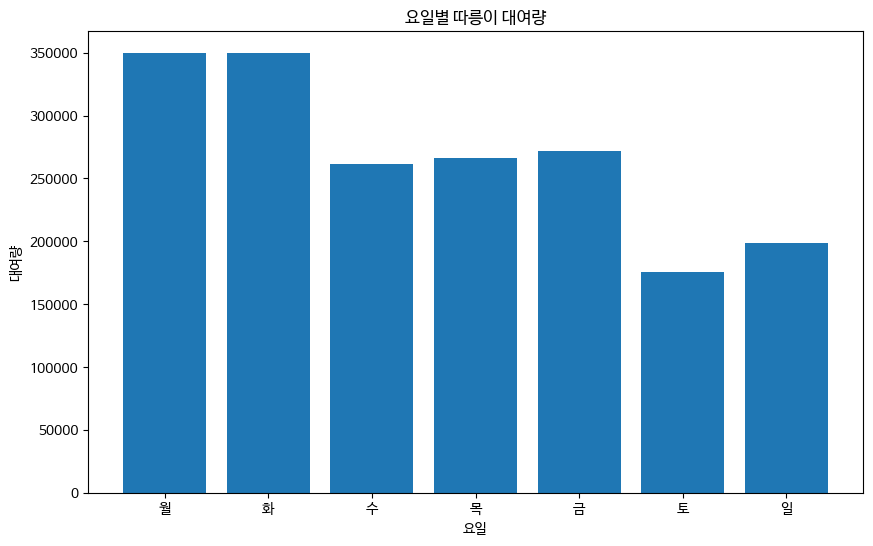

In [132]:
# prompt: result_df2에서 대여요일을 groupby하고 '월 화 수 목 금 토 일'로 인덱스를 바인딩해서 세로막대차트에 출력해줘

rent_by_day = public_bike['대여요일'].value_counts().sort_index()
days_order = ['월', '화', '수', '목', '금', '토', '일']
rent_by_day.index = days_order

plt.figure(figsize=(10, 6))
plt.bar(rent_by_day.index, rent_by_day.values)
plt.title('요일별 따릉이 대여량')
plt.xlabel('요일')
plt.ylabel('대여량')
plt.show()

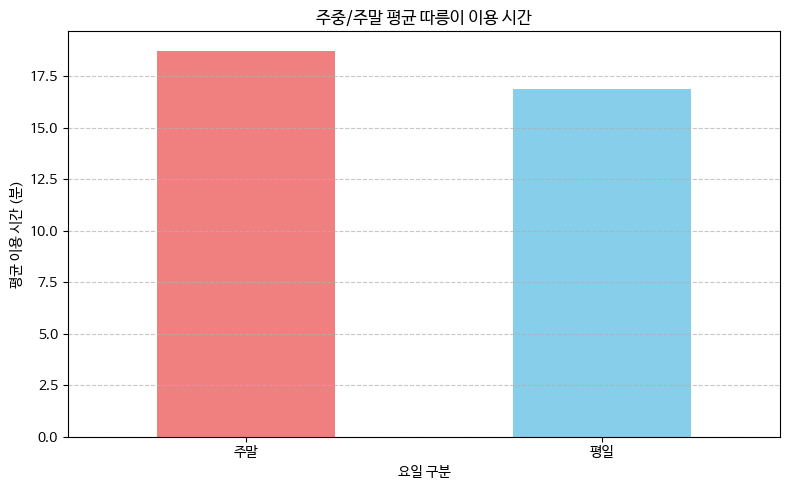

In [140]:
# prompt: result_df2에서 '월 화 수 목 금'은 평일, '토 일'은 주말로 groupby하고 평균이용량을 보여주는 막대그래프를 그려줘

# 주중/주말 구분 컬럼 생성
public_bike['요일구분'] = public_bike['대여요일'].apply(lambda x: '평일' if x < 5 else '주말')

# 요일구분별 평균 이용량 계산
average_usage_by_daytype = public_bike.groupby('요일구분')['이용시간(분)'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(8, 5))
average_usage_by_daytype.plot(kind='bar', color=['lightcoral','skyblue'])
plt.title('주중/주말 평균 따릉이 이용 시간')
plt.xlabel('요일 구분')
plt.ylabel('평균 이용 시간 (분)')
plt.xticks(rotation=0) # x축 레이블 회전 방지
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 시간대별 사용량 분석
평일에는 주로 출퇴근 시간인 오전7시부터 오전8시, 오후5시부터 오후7시까지 사용량이 많고 주말에는 오전8시부터 오후8시까지 사용량이 대체적으로 많은 것을 확인할 수 있습니다.

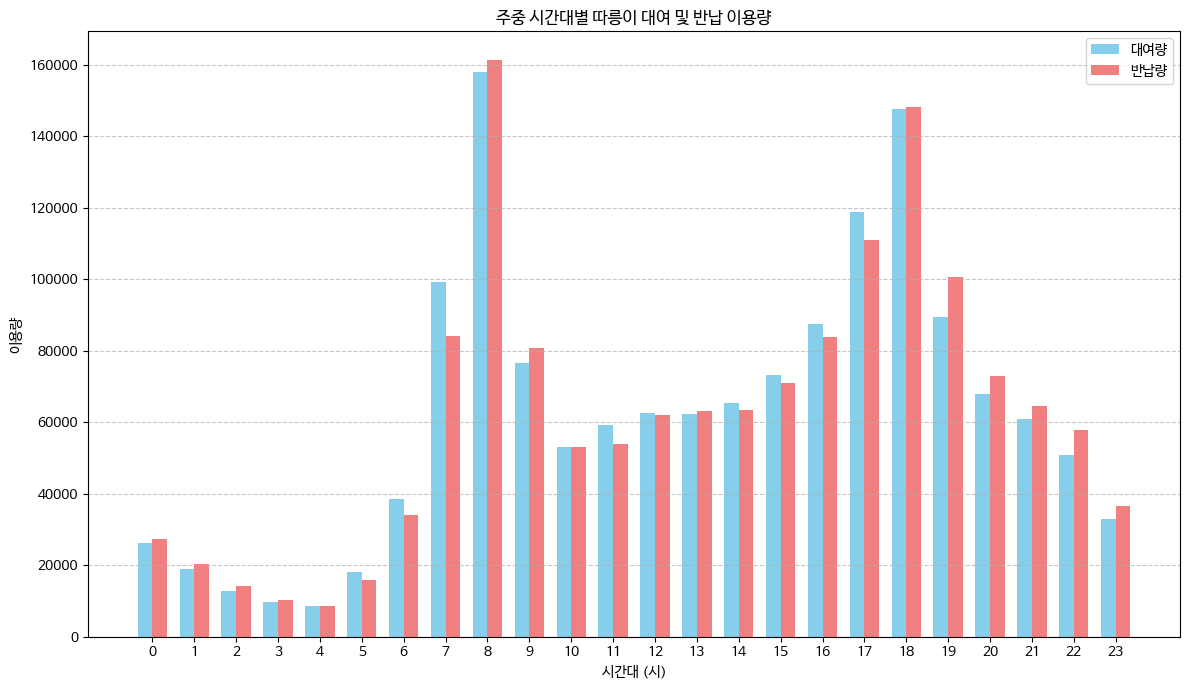

In [136]:
# prompt: public_bike에 '월 화 수 목 금'으로 평일 대여시간, 반납시간을 시간대 별로 이용량 막대그래프를 합쳐서 그려줘

# 주중 시간대별 대여 및 반납 시간 데이터 준비
weekday_rent_hours = public_bike[public_bike['요일구분'] == '주중']['대여시간']
weekday_return_hours = public_bike[public_bike['요일구분'] == '주중']['반납시간']

# 시간대별 이용량 계산 (대여/반납)
rent_counts_weekday = weekday_rent_hours.value_counts().sort_index()
return_counts_weekday = weekday_return_hours.value_counts().sort_index()

# 모든 시간대 (0-23) 포함하도록 데이터프레임 생성
hours_df = pd.DataFrame({'대여량': rent_counts_weekday, '반납량': return_counts_weekday}).fillna(0)
hours_df = hours_df.reindex(range(24), fill_value=0) # 0시부터 23시까지 모든 시간대 포함

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35
hours = hours_df.index
rent_bars = ax.bar(hours - bar_width/2, hours_df['대여량'], bar_width, label='대여량', color='skyblue')
return_bars = ax.bar(hours + bar_width/2, hours_df['반납량'], bar_width, label='반납량', color='lightcoral')

# 그래프 설정
ax.set_xlabel('시간대 (시)')
ax.set_ylabel('이용량')
ax.set_title('주중 시간대별 따릉이 대여 및 반납 이용량')
ax.set_xticks(hours)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


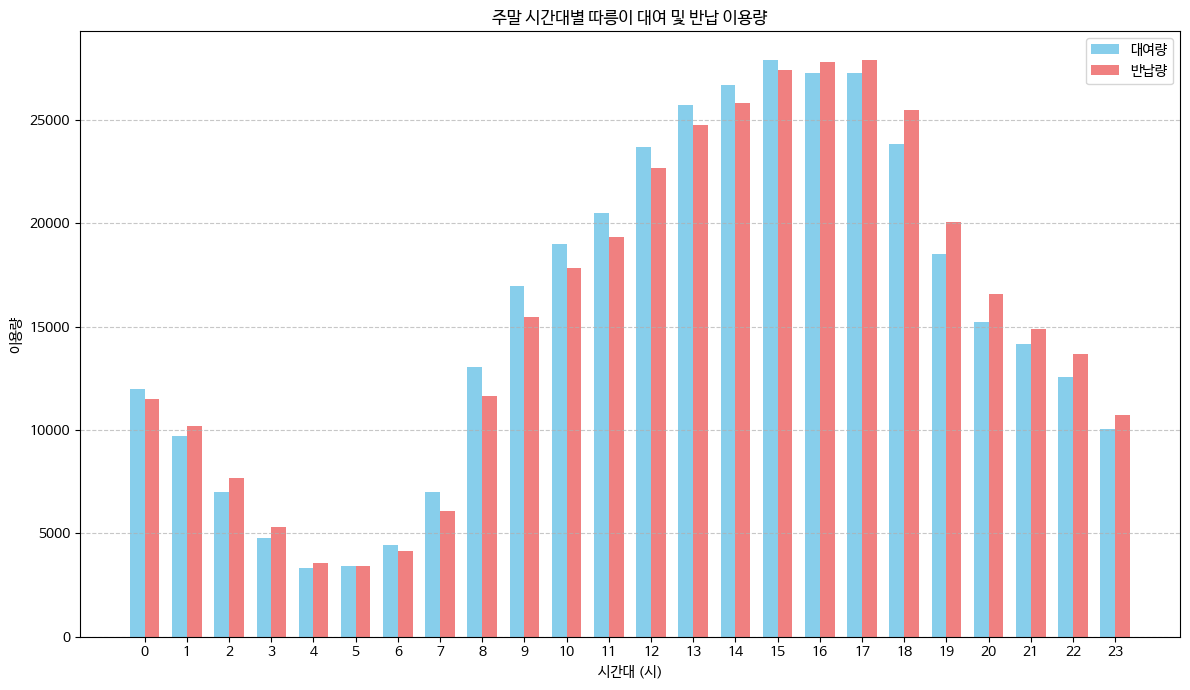

In [137]:
# prompt: public_bike에 '토 일'로 주말 대여시간, 반납시간을 시간대 별로 이용량 막대그래프를 합쳐서 그려줘

# 주말 시간대별 대여 및 반납 시간 데이터 준비
weekend_rent_hours = public_bike[public_bike['요일구분'] == '주말']['대여시간']
weekend_return_hours = public_bike[public_bike['요일구분'] == '주말']['반납시간']

# 시간대별 이용량 계산 (대여/반납)
rent_counts_weekend = weekend_rent_hours.value_counts().sort_index()
return_counts_weekend = weekend_return_hours.value_counts().sort_index()

# 모든 시간대 (0-23) 포함하도록 데이터프레임 생성
hours_df_weekend = pd.DataFrame({'대여량': rent_counts_weekend, '반납량': return_counts_weekend}).fillna(0)
hours_df_weekend = hours_df_weekend.reindex(range(24), fill_value=0) # 0시부터 23시까지 모든 시간대 포함

# 막대 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35
hours = hours_df_weekend.index
rent_bars_weekend = ax.bar(hours - bar_width/2, hours_df_weekend['대여량'], bar_width, label='대여량', color='skyblue')
return_bars_weekend = ax.bar(hours + bar_width/2, hours_df_weekend['반납량'], bar_width, label='반납량', color='lightcoral')

# 그래프 설정
ax.set_xlabel('시간대 (시)')
ax.set_ylabel('이용량')
ax.set_title('주말 시간대별 따릉이 대여 및 반납 이용량')
ax.set_xticks(hours)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### 서울시 자치구별 시간대에 따른 따릉이 이용량
강서구,송파구,양천구,영등포구의 대여 및 반납건이 많고 출퇴근 시간인 오전7부터 오전8시, 오후5시부터 오후7시까지 이용을 많이 하는 것을 알 수있습니다.

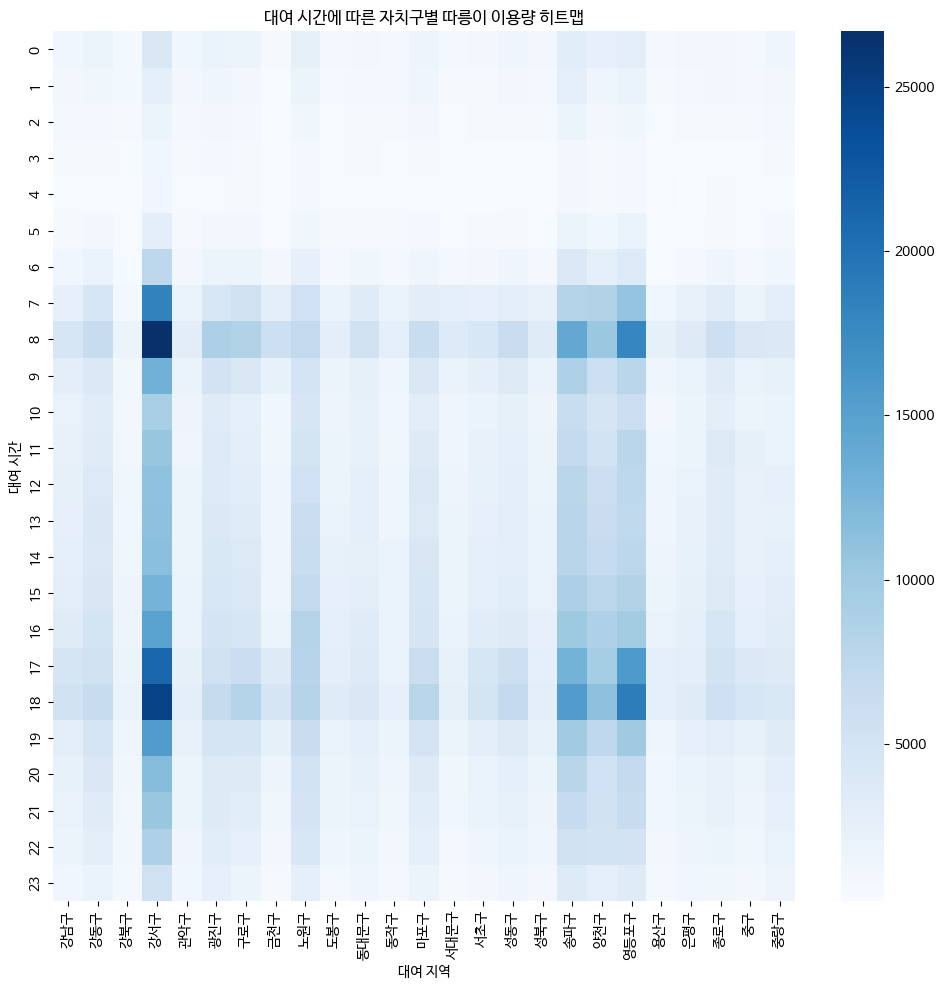

In [142]:
# prompt: public_bike에서 대여시간에 따른 각 자치구별 이용량을 히트맵을 그려줘

import seaborn as sns

# 대여시간과 자치구별 이용량 집계
heatmap_data = public_bike.groupby(['대여시간', '대여 지역']).size().unstack(fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, cmap="Blues", annot=False, fmt='d') # annot=True 시 값 표시
plt.title('대여 시간에 따른 자치구별 따릉이 이용량 히트맵')
plt.xlabel('대여 지역')
plt.ylabel('대여 시간')
plt.tight_layout()
plt.show()

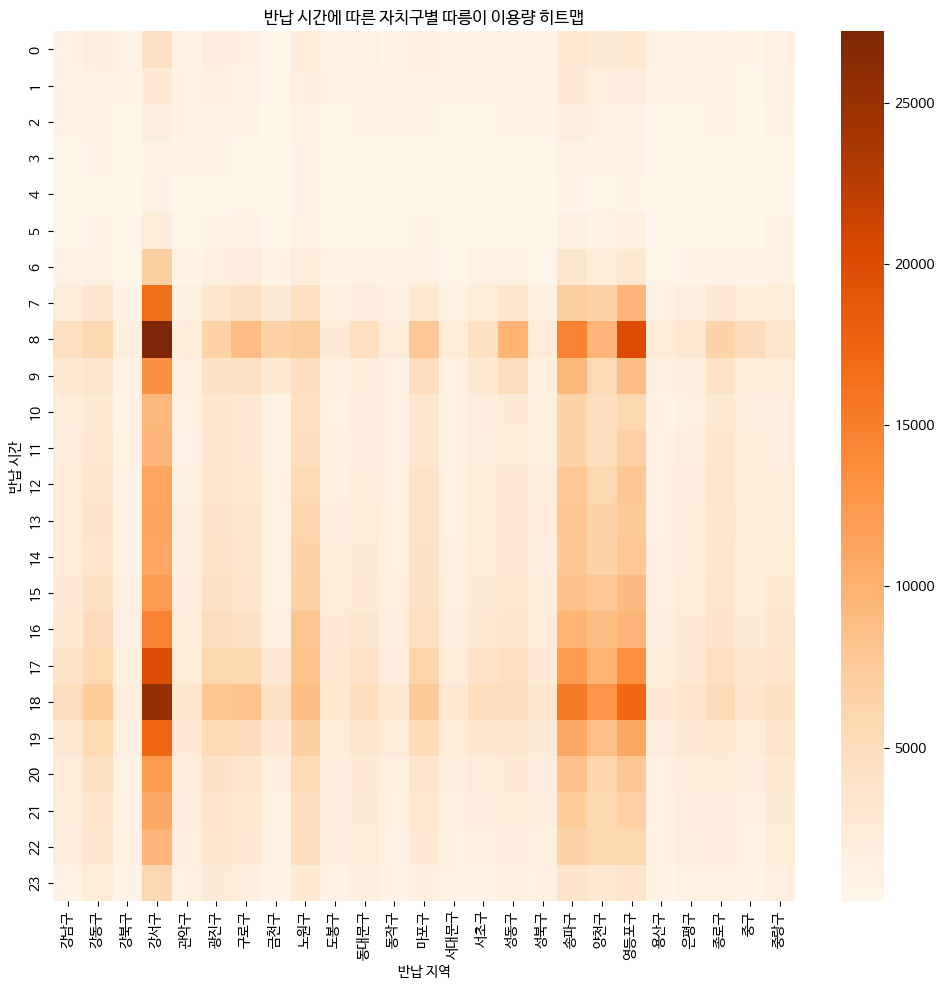

In [144]:
# prompt: public_bike에서 반납시간에 따른 각 자치구별 이용량을 히트맵을 그려줘

# 반납시간과 자치구별 이용량 집계
heatmap_data_return = public_bike.groupby(['반납시간', '반납 지역']).size().unstack(fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data_return, cmap="Oranges", annot=False, fmt='d') # annot=True 시 값 표시
plt.title('반납 시간에 따른 자치구별 따릉이 이용량 히트맵')
plt.xlabel('반납 지역')
plt.ylabel('반납 시간')
plt.tight_layout()
plt.show()

## 결론
- 평일과 주말중에는 평일에 따릉이 이용객이 많습니다
- 주말에 따릉이를 이용하는 평균시간이 더 깁니다
- 이용객이 많은 자치구는 강서구,송파구,양천구,영등포구로 대여와 반납건수가 비슷합니다.

### 활용방안
이용객이 많은 곳에 따릉이 자전거와 필요인력을 더 배치하여 효율적으로 관리할 수있는 근거가 될 수 있습니다. 추후, 대여소의 위치와 자전거의 이동경로 등을 분석해 자전거의 재배치에 활용할 수 있습니다.